**Cluster Analysis - Hierarchische Methoden**

Um hierarchischen Clustering geht es um eine unbeaufsichtigte maschinelle Lernmethode, mit der Sie Untergruppen, basierend auf dem Unterschied zwischen Datenpunkten und ihren nächsten Nachbarn vorhersagen können.

Diese haben eine gewisse Entfernung voneinander und jeder Datenpunkt ist mit seinem Nachbarn verknüpft, zumindest mit dem Nachbarn, der sich entsprechend der von Ihnen ausgewählten Distanzmetrik in der Nähe befindet. Man muss also bei diesem Konzept erstmal die Entfernung finden, die Entfernung zu den Nachbarn ermitteln und dann muss man Verbindungen schaffen mit den nächsten Nachbarn.

1. **Finden** Entfernung

2. **Verbinden** mit den näschten Nachbar

Durch so ein hierarchisches Clustering werden Untergruppen innerhalb von Daten vorhergesagt, indem man Abstand zwischen jedem Datenpunkt und seinem nächsten Nachbarn ermittelt und dann die nächsten gelegenen Nachbar miteinander eben verbunden werden.Die Anzahl der Untergruppen, die für ein hierarchisches Clustering-Modell geeignet sind, können Sie anhand eines Dendrogramms ermitteln. Ein Dendrogramm ist ein Baumdiagramm, so wie Sie es hier sehen, das zur visuellen Anzeige von verschiedenen Dingen genutzt werden kann, etwa Verwandschaftsbeziehung, Abstammungslinien, oder auch allgemein Taxonomien. Unter so einer Taxonomie versteht man ein einheitliches Verfahren oder Modell, mit dem Objekte nach bestimmten Kriterien klassifiziert werden, man bildet also Klassifizierungsschemen.

Es gibt nun eine ganze Reihe an möglichen Anwendungsfällen für so ein hierarchisches Clustering. Man kann an das Ressourcen-Management in einem Krankenhaus denken, Geschäftsprozess-Management, man kann Kundensegmentierung sich vorstellen, oder auch die Analyse sozialer Netzwerke. Für das hierarchische Clustering-Modell müssen Sie dem Modell mitteilen, wie viele Zentren verwendet werden sollen. 


&nbsp;




                                                 
|Entfernung metriken|Verbindungsparameter| 
|-------------------|--------------------|
| Euklidische distanz  |  ward(station)|                        
| manhattan distanz  |  complete(komplete)|
|kosinus distanz |  Average(durchschnitt)|



&nbsp;





Ein Beispiel: Sie wollen die funktionellen Gruppen von Genen identifizieren, indem Sie alle in einer Zelle aktiven Gene identifizieren und dann versuchen diese zu kopieren. Und wenn Sie sich dann für eine hierarchische Gruppierung entscheiden, dann versuchen Sie Gruppen anhand des Abstands zwischen den Datenpunkten und ihren nächsten Nachbarn in einem Gen Expression Profile zu identifizieren. Datenpunkte, die am ähnlichsten sind, werden in derselben genetischen Funktionsgruppe zusammengefasst. 


In diese Aufgabe werden wir eine cvs Dataset benutzen.Die Datei beinhalte  Sportautos Eigenschaften. Wir werden uns Insbesondere auf die Spalte **am** Konzentrieren. Hier wird nämlich durch einen binären Wert gekennzeichnet, ob ein Auto ein Automatikgetriebe oder ein Schaltgetriebe hat. Und um mal anzudeuten, wo es hingehen könnte, man könnte ja gucken, was haben Autos mit einem Schaltgetriebe an Gemeinsamkeiten, was haben Autos mit einem Automatikgetriebe an Gemeinsamkeiten, und in diese Richtung eine Auswertung beispielsweise vornehmen. 



In [1]:
import numpy as np
import pandas as pd

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

Die Spaltenbeschriftungen werden genau entsprechend des Aufbaus der Datei gewählt. 

Wir werden eine Teilmenge X betrachten und wir werden nur die Variablen **mpg, disp, hp und wt** betrachten. 

Das sind Angaben zum Kraftstoffverbrauch, dem Hubraum, der Leistung und dem Gewicht. Und wir identifizieren diese anhand der Indizes der Spalten mittels dieses Indexers. Also, der Index 1 steht für mpg, 3 disp, 4 hp und 6 für wt, weight.

Da wir die Werte aus den Spalten haben wollen, steht hier natürlich wieder values, also .values Und damit extrahieren wir eine Teilmenge der Gesamtdaten. Unsere Ziel-Variable wird am sein und das ist ja die Aussage, ob es sich um ein Schaltgetriebe oder ein Automatikgetriebe handelt und die steht beim Index 9. 


Die Ziel-Variable Y wird auch mit einem Indexer ermittelt und die Werte werden mit Values zurückgegeben. Unsere Ziel-Variable wird am sein und das ist ja die Aussage, ob es sich um ein Schaltgetriebe oder ein Automatikgetriebe handelt und die steht beim Index 9

In [2]:
address = 'mtcars\mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

X = cars.iloc[:,[1,3,4,6]].values

y = cars.iloc[:,[9]].values

**Verwendung von scipy zum Erstellen des Dendrogramms**



Wir haben zuerst eine Verknüpfungsfunktion **(Linkage)** X sind die Daten, die hier verknüpft werden.

Diese Funktion führt das hierarchische Clustering auf Basis unserer Daten durch und mit dem entsprechenden zweiten Argument wird die Art der Verknüpfung festgelegt, in diesem Fall das Wort-Argument **ward**. 

In [3]:
Z = linkage(X, 'ward')

Dendrogram erzeugen:

Dieser Funktion, Dendrogramm, wird Z übergeben, was die Rückgabe von dieser linkage-Funktion repräsentiert.

Dieser Funktion, Dendrogramm, wird Z übergeben, was die Rückgabe von dieser linkage-Funktion repräsentiert. Z sind die Clustering-Ergebnisse, die von dem Algorithmus von dem Framework generiert wurden.

Mit beiden Zeilenl plt.axhline(y=500) plt.axhline(y=150) werden Linien in das Diagramm gezogen, anhand derer man an den Schnittpunkten erkennen kann, wie viele Cluster man bauen soll, einmal bei der Entfernung 150 und einmal bei der Entfernung 500. 


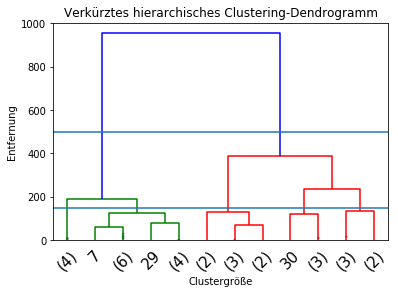

In [4]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)

plt.title('Verkürztes hierarchisches Clustering-Dendrogramm')
plt.xlabel('Clustergröße')
plt.ylabel('Entfernung')

plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

Hierarchische Cluster generieren
k ist zwei cluster.

Genauigkeit-Score-Funktion von sklearn verwenden, um unser Modell zu bewerten, das macht hier diese Methode accuracy_score. Parameter sind unsere Zielvariable Y und die vorhergesagten Werte, die aus unserem hierarchischen Clustering-Modell generiert wurden. Wenn wir das ausführen, werden wir herausfinden, wie gut dieses Modell arbeitet. Wir bekommen den Wert 0,78, also, 78% etwa.

Der Wert 1 steht für 100% und das ist die optimale Ausbeute, die wir erreichen können und 0 die denkbar schlechteste, Werte so um die **80 herum sind ganz brauchbar**. 


In [5]:
k=2

Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.78125

Es wird ausprobiert ob durch eine andere Kombination der Parameter nicht bessere Werte erreichen werden. Also über 80% 


In [12]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.4375

In [13]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [14]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.71875